In [14]:
import pandas as pd
import seaborn as sns

In [15]:
data = pd.read_csv('job_fit_1000.csv')
print(data.head())

        id                                    required_skills  \
0  FIT0000          Docker, Excel, Linux, R, REST, TensorFlow   
1  FIT0001  CI/CD, Docker, Flask, JavaScript, Kubernetes, ...   
2  FIT0002   Django, Node.js, PyTorch, React, SQL, TensorFlow   
3  FIT0003  Docker, ETL, Flask, Python, REST, TensorFlow, ...   
4  FIT0004             Airflow, Docker, Kubernetes, Pandas, R   

                                    candidate_skills     degree  \
0              AWS, Airflow, ETL, Hadoop, TypeScript    Masters   
1                   Kubernetes, NumPy, Python, Spark    Masters   
2  Django, Git, Kubernetes, Node.js, NumPy, React...    Masters   
3                     AWS, Excel, Hadoop, PyTorch, R  Bachelors   
4                Docker, GraphQL, PyTorch, REST, SQL  Bachelors   

   years_experience  overlap  fit  probability  \
0               0.9      0.0  0.0        0.237   
1               1.9      2.0  1.0        0.467   
2               2.5      3.0  1.0        0.585   
3     

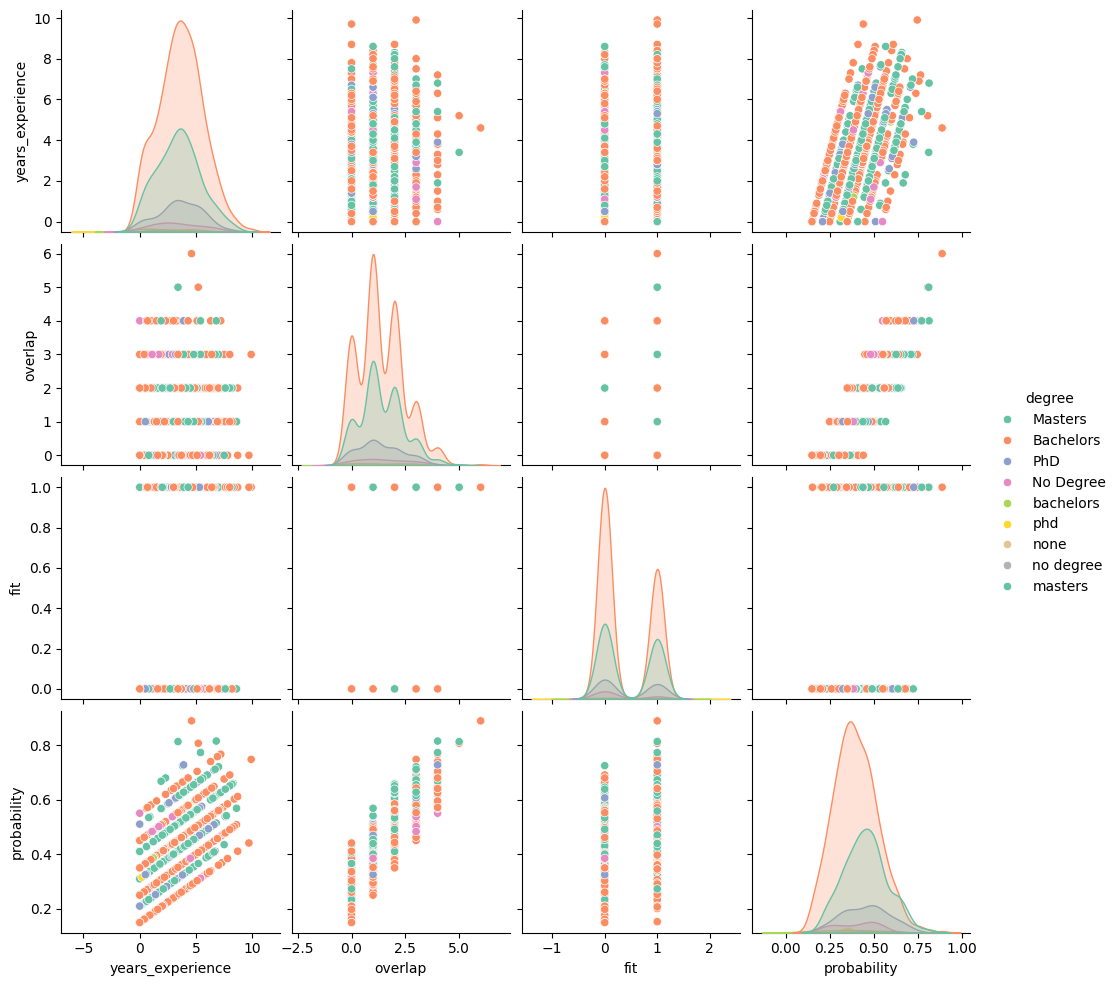

In [16]:
numeric_cols = ["years_experience", "overlap", "fit", "probability"]

# Pairplot with hue
sns.pairplot(data, vars=numeric_cols, hue="degree", palette="Set2", diag_kind="kde")
plt.show()

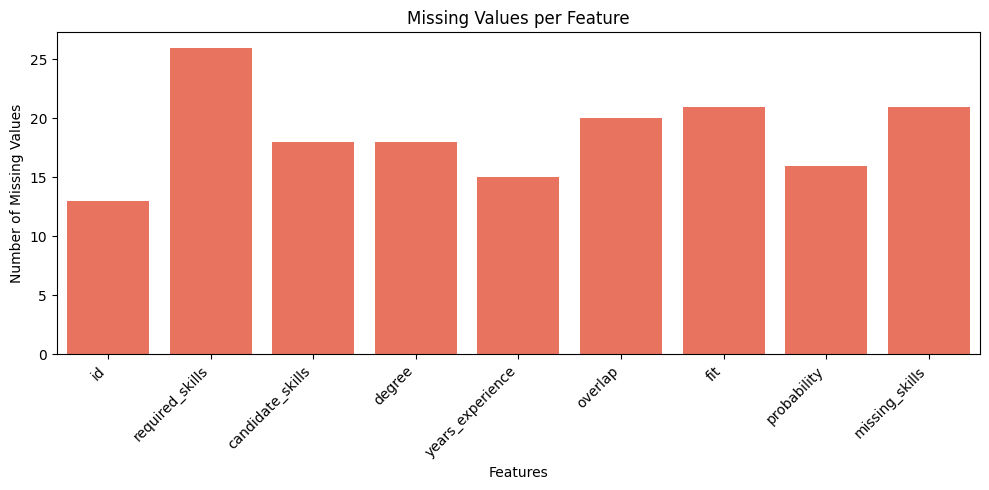

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
missing = data.isnull().sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, color='tomato')
plt.title("Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
data = data.dropna(subset=['required_skills', 'fit'])
data['candidate_skills'] = data['candidate_skills'].fillna('')
data['years_experience'] = data['years_experience'].fillna(data['years_experience'].median())
data.columns

Index(['id', 'required_skills', 'candidate_skills', 'degree',
       'years_experience', 'overlap', 'fit', 'probability', 'missing_skills'],
      dtype='object')

In [19]:
def calculate_core_features(row):
    req_skills = [s.strip().lower() for s in str(row['required_skills']).split(',') if s.strip()]
    cand_skills = [s.strip().lower() for s in str(row['candidate_skills']).split(',') if s.strip()]
    
    if not req_skills:
        return 0, 0, 0
    
    overlap = len(set(req_skills) & set(cand_skills))
    match_ratio = overlap / len(req_skills)
    coverage_ratio = overlap / max(len(cand_skills), 1)
    return match_ratio, coverage_ratio, len(req_skills)

In [20]:
degree_map = {'bachelors': 0, 'masters': 1, 'phd': 2, 'no degree': 0}
data['degree_encoded'] = data['degree'].str.lower().map(degree_map).fillna(0)

core_features = data.apply(calculate_core_features, axis=1, result_type='expand')
data[['skill_match_ratio', 'candidate_coverage', 'required_skill_count']] = core_features
    
data['skills_text'] = data['required_skills'].fillna('') + ' ' + data['candidate_skills'].fillna('')
    
data['fit'] = data['fit'].astype(int)
print(data.head())

        id                                    required_skills  \
0  FIT0000          Docker, Excel, Linux, R, REST, TensorFlow   
1  FIT0001  CI/CD, Docker, Flask, JavaScript, Kubernetes, ...   
2  FIT0002   Django, Node.js, PyTorch, React, SQL, TensorFlow   
3  FIT0003  Docker, ETL, Flask, Python, REST, TensorFlow, ...   
4  FIT0004             Airflow, Docker, Kubernetes, Pandas, R   

                                    candidate_skills     degree  \
0              AWS, Airflow, ETL, Hadoop, TypeScript    Masters   
1                   Kubernetes, NumPy, Python, Spark    Masters   
2  Django, Git, Kubernetes, Node.js, NumPy, React...    Masters   
3                     AWS, Excel, Hadoop, PyTorch, R  Bachelors   
4                Docker, GraphQL, PyTorch, REST, SQL  Bachelors   

   years_experience  overlap  fit  probability  \
0               0.9      0.0    0        0.237   
1               1.9      2.0    1        0.467   
2               2.5      3.0    1        0.585   
3     

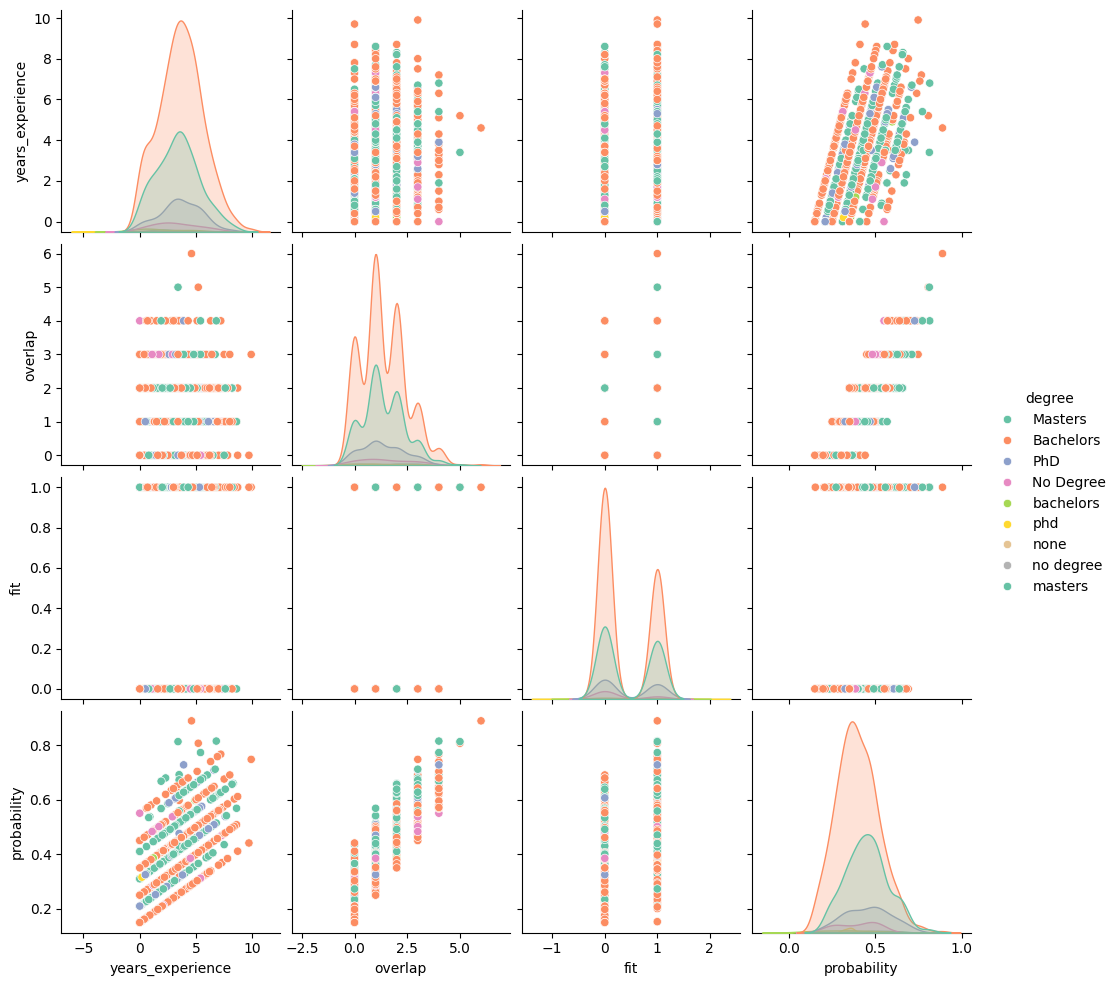

In [21]:
numeric_cols = ["years_experience", "overlap", "fit", "probability"]

# Pairplot with hue
sns.pairplot(data, vars=numeric_cols, hue="degree", palette="Set2", diag_kind="kde")
plt.show()

In [23]:
df = pd.read_csv("job_fit_cleaned.csv")
print(df.head())

        id                                    required_skills  \
0  FIT0000          Docker, Excel, Linux, R, REST, TensorFlow   
1  FIT0001  CI/CD, Docker, Flask, JavaScript, Kubernetes, ...   
2  FIT0002   Django, Node.js, PyTorch, React, SQL, TensorFlow   
3  FIT0003  Docker, ETL, Flask, Python, REST, TensorFlow, ...   
4  FIT0004             Airflow, Docker, Kubernetes, Pandas, R   

                                    candidate_skills     degree  \
0              AWS, Airflow, ETL, Hadoop, TypeScript    Masters   
1                   Kubernetes, NumPy, Python, Spark    Masters   
2  Django, Git, Kubernetes, Node.js, NumPy, React...    Masters   
3                     AWS, Excel, Hadoop, PyTorch, R  Bachelors   
4                Docker, GraphQL, PyTorch, REST, SQL  Bachelors   

   years_experience  overlap  fit  probability  \
0               0.9      0.0    0        0.237   
1               1.9      2.0    1        0.467   
2               2.5      3.0    1        0.585   
3     

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
        max_features=1500,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.7
    )
skills_tfidf = tfidf.fit_transform(df['skills_text'])
print(df.head())

        id                                    required_skills  \
0  FIT0000          Docker, Excel, Linux, R, REST, TensorFlow   
1  FIT0001  CI/CD, Docker, Flask, JavaScript, Kubernetes, ...   
2  FIT0002   Django, Node.js, PyTorch, React, SQL, TensorFlow   
3  FIT0003  Docker, ETL, Flask, Python, REST, TensorFlow, ...   
4  FIT0004             Airflow, Docker, Kubernetes, Pandas, R   

                                    candidate_skills     degree  \
0              AWS, Airflow, ETL, Hadoop, TypeScript    Masters   
1                   Kubernetes, NumPy, Python, Spark    Masters   
2  Django, Git, Kubernetes, Node.js, NumPy, React...    Masters   
3                     AWS, Excel, Hadoop, PyTorch, R  Bachelors   
4                Docker, GraphQL, PyTorch, REST, SQL  Bachelors   

   years_experience  overlap  fit  probability  \
0               0.9      0.0    0        0.237   
1               1.9      2.0    1        0.467   
2               2.5      3.0    1        0.585   
3     

In [28]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

numeric_features = [
        'degree_encoded', 
        'years_experience', 
        'skill_match_ratio',
        'candidate_coverage',
        'required_skill_count'
    ]
    
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df[numeric_features])
    
X = hstack([skills_tfidf, numeric_scaled])
y = df['fit']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_random_state = 42
    
for random_state in [42, 123, 456, 789, 999]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=random_state, stratify=y
    )
    
    model = LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        random_state=42,
        C=0.8,
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=best_random_state, stratify=y
)

best_c = 0.8
best_c_accuracy = 0

for C_value in [0.5, 0.8, 1.0, 1.2, 1.5]:
    model = LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        random_state=42,
        C=C_value,
        solver='liblinear'
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_c_accuracy:
        best_c_accuracy = accuracy
        best_c = C_value

final_model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced', 
    random_state=42,
    C=best_c,
    solver='liblinear'
)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6458333333333334
